# Model Klasifikasi Logistic Regression untuk Prediksi Penyakit Jantung

Notebook ini menunjukkan implementasi **Logistic Regression** menggunakan pustaka `scikit-learn` dan `mglearn` untuk memprediksi penyakit jantung berdasarkan fitur yang tersedia.

Model ini akan dievaluasi menggunakan metrik berikut:

- **Akurasi**
- **Presisi**
- **Recall**
- **F1-Score**
- **AUC (Area Under Curve)**
- **ROC (Receiver Operating Characteristic Curve)**

Selain itu, setiap rumus yang digunakan akan dijelaskan secara matematis.


In [3]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

# Mengatur gaya tampilan grafik
sns.set_style("whitegrid")


## 1. Memuat dan Menampilkan Dataset

Kita akan memuat dataset dan melihat struktur datanya.


In [5]:
# Memuat dataset
df = pd.read_csv("HeartDisease.csv")

# Mengubah target menjadi biner (1 jika ada penyakit, 0 jika tidak)
df["target"] = (df["num"] > 0).astype(int)
df.drop(columns=["num"], inplace=True)

# Menampilkan 5 baris pertama
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 2. Pra-pemrosesan Data

Agar model dapat bekerja dengan baik, kita melakukan beberapa langkah berikut:
- Menghapus nilai yang hilang (NaN)


In [6]:
# Menghapus nilai NaN jika ada
df.dropna(inplace=True)

# Menampilkan jumlah data setelah pembersihan
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


## 3. Memisahkan Data Latih dan Data Uji

Kita akan membagi dataset menjadi **data latih (80%)** dan **data uji (20%)**.


In [7]:
# Mendefinisikan fitur dan target
X = df.drop(columns=["target"])
y = df["target"]

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran dataset
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 237
Jumlah data uji: 60


## 4. Melatih Model Logistic Regression

Model logistic regression akan dipelajari berdasarkan data latih yang telah dibagi sebelumnya.


In [8]:
# Inisialisasi dan pelatihan model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Menampilkan koefisien model
print("Koefisien model:", model.coef_)
print("Intercept model:", model.intercept_)


Koefisien model: [[-0.00669958  0.82607802  0.5306605   0.02285707  0.00376046 -0.68298039
   0.32465779 -0.01037674  0.67891999  0.41041065  0.47983794  1.00627954
   0.40768345]]
Intercept model: [-8.64773984]


## 5. Melakukan Prediksi

Setelah model dilatih, kita akan menggunakannya untuk memprediksi data uji.


In [9]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Menampilkan 5 hasil prediksi pertama
print("Prediksi pertama:", y_pred[:5])


Prediksi pertama: [0 0 0 0 1]


## 6. Evaluasi Model

Kita akan mengevaluasi model menggunakan enam metrik utama:

### 6.1 Akurasi
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
Akurasi menunjukkan seberapa sering model membuat prediksi yang benar.

### 6.2 Presisi
$$Precision = \frac{TP}{TP + FP}$$
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif.

### 6.3 Recall
$$Recall = \frac{TP}{TP + FN}$$
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

### 6.4 F1-Score
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
F1-Score adalah rata-rata harmonik antara presisi dan recall.

### 6.5 AUC (Area Under Curve)
AUC mengukur seberapa baik model membedakan antara kelas positif dan negatif.

### 6.6 ROC (Receiver Operating Characteristic Curve)
ROC adalah kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).


Akurasi: 0.833
Presisi: 0.846
Recall: 0.786
F1-Score: 0.815
AUC: 0.949


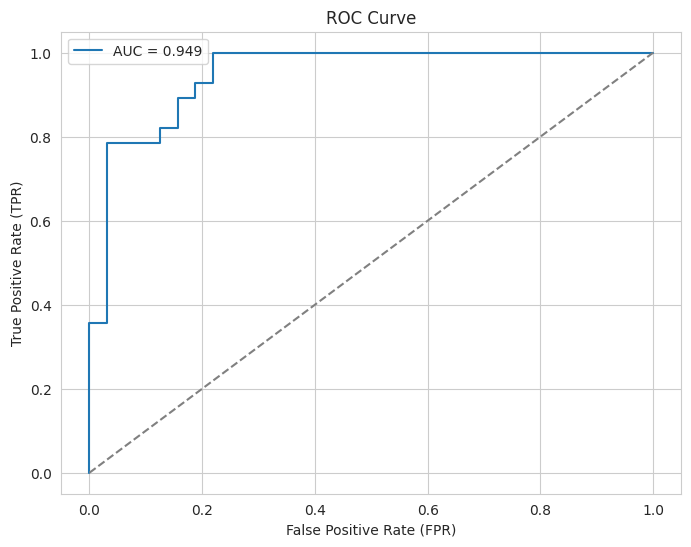

In [10]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.3f}")
print(f"Presisi: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()
